# How to Generate FiveThirtyEight Graphs in Python

[source](https://www.dataquest.io/blog/making-538-plots/)

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
direct_link = 'https://randalolson.com/assets/2014/06/percent-bachelors-degrees-women-usa.csv'
women_majors = pd.read_csv(direct_link)
print(women_majors.info())
women_majors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           42 non-null     int64  
 1   Agriculture                    42 non-null     float64
 2   Architecture                   42 non-null     float64
 3   Art and Performance            42 non-null     float64
 4   Biology                        42 non-null     float64
 5   Business                       42 non-null     float64
 6   Communications and Journalism  42 non-null     float64
 7   Computer Science               42 non-null     float64
 8   Education                      42 non-null     float64
 9   Engineering                    42 non-null     float64
 10  English                        42 non-null     float64
 11  Foreign Languages              42 non-null     float64
 12  Health Professions             42 non-null     float

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## About FiveThirtyEight Graph

In [3]:
under_20 = women_majors.loc[0, women_majors.loc[0] < 20]
under_20

Agriculture           4.229798
Architecture         11.921005
Business              9.064439
Computer Science     13.600000
Engineering           0.800000
Physical Sciences    13.800000
Name: 0, dtype: float64

In [5]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
style.use('fivethirtyeight')

Text(1976, 18, 'Physical Sciences')

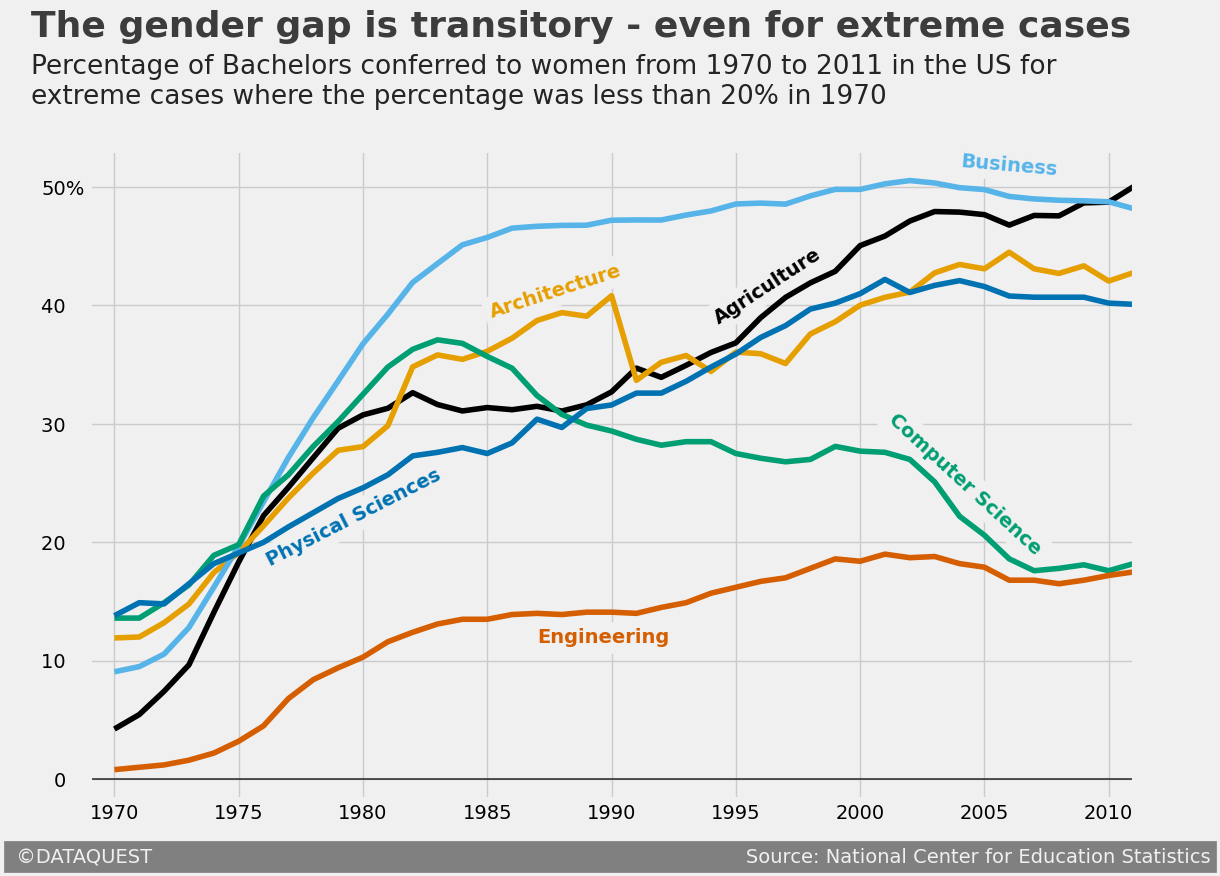

In [37]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

fte_graph = women_majors.plot(x = 'Year', y = under_20.index, figsize = (12,8), color = colors, legend = False)
fte_graph.set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])
fte_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
fte_graph.set_xlim(left = 1969, right = 2011)

# Remove the label of the x-axis
fte_graph.xaxis.label.set_visible(False)

# The signature bar
text = ' ©DATAQUEST'+' '*95+'Source: National Center for Education Statistics'

fte_graph.text(x = 1965.8, y = -7,
    s = text,fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
fte_graph.text(x = 1966.65, y = 62.7, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
fte_graph.text(x = 1966.65, y = 57,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)



# Add colored labels
fte_graph.text(x = 1994, y = 38.5, s = 'Agriculture', color = colors[0], weight = 'bold', rotation = 33,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1985, y = 39, s = 'Architecture', color = colors[1], weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2004, y = 51, s = 'Business', color = colors[2], weight = 'bold', rotation = -5,
               backgroundcolor = '#f0f0f0')
fte_graph.text(x = 2001, y = 19, s = 'Computer Science', color = colors[3], weight = 'bold', rotation = -42.5,
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1987, y = 11.5, s = 'Engineering', color = colors[4], weight = 'bold',
              backgroundcolor = '#f0f0f0')
fte_graph.text(x = 1976, y = 18, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27,
              backgroundcolor = '#f0f0f0')